<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#BCS-superconductivity" data-toc-modified-id="BCS-superconductivity-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>BCS superconductivity</a></span></li><li><span><a href="#Andreev-Bound-States" data-toc-modified-id="Andreev-Bound-States-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Andreev Bound States</a></span><ul class="toc-item"><li><span><a href="#Icmax-as-a-function-of-transparency" data-toc-modified-id="Icmax-as-a-function-of-transparency-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Icmax as a function of transparency</a></span></li><li><span><a href="#Icmax-as-a-function-of-phase" data-toc-modified-id="Icmax-as-a-function-of-phase-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Icmax as a function of phase</a></span></li><li><span><a href="#Ic(tau,delta)" data-toc-modified-id="Ic(tau,delta)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ic(tau,delta)</a></span></li></ul></li></ul></div>

This jupyter notebook serves to create all the model plots for my thesis

# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# BCS superconductivity

Link to [BCS theory](http://www.scholarpedia.org/article/Bardeen-Cooper-Schrieffer_theory)

In [22]:
def FD_dist(en,T):
    return 1/(1+np.exp(en/T))

def rho_s(en,T):
    return abs(en/np.sqrt(en**2-delta**2))

/home/feschmidt/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/feschmidt/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


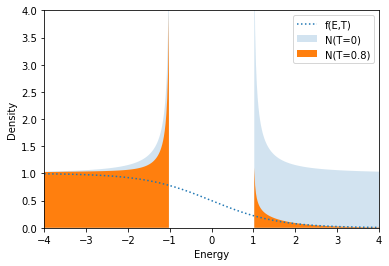

In [54]:
en = np.linspace(-4,4,401)
T = 0.8
delta = 1

plt.plot(en,FD_dist(en,T),label='f(E,T)',ls=':')
plt.fill_between(en,0,rho_s(en,0),alpha=0.2,label='N(T=0)')
plt.fill_between(en,0,rho_s(en,T)*FD_dist(en,T),label='N(T={})'.format(T))
plt.xlim(en[0],en[-1])
plt.ylim(0,4)
plt.legend(loc='best')
plt.xlabel('Energy')
plt.ylabel('Density')
plt.show()
plt.close()

# Andreev Bound States

## Icmax as a function of transparency

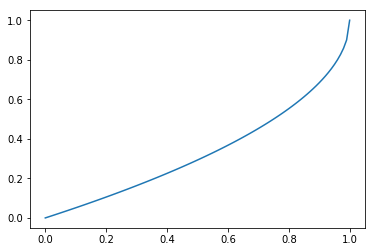

In [2]:
taus=np.linspace(0,1,101)
Imax=1-np.sqrt(1-taus)

plt.plot(taus,Imax)
plt.show()
plt.close()

## Icmax as a function of phase

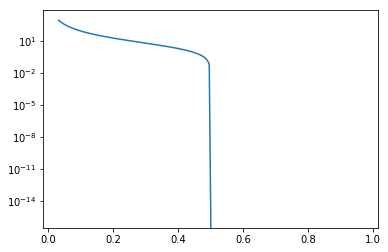

In [14]:
deltas=np.linspace(0.1,np.pi-0.1,201)
taus=(8*np.cos(deltas))/(-3 + 4*np.cos(deltas) - np.cos(2*deltas))
Imax=-(taus*np.sin(deltas))/np.sqrt(1-taus*np.sin(deltas/2)**2)

plt.plot(deltas/np.pi,Imax)
plt.yscale('log')
plt.show()
plt.close()

## Ic(tau,delta)

In [2]:
# %matplotlib inline

deltas=np.linspace(0,2*np.pi,1001)
taus=np.linspace(0.001,0.999,1001)
def Is(tau,delta):
    return (tau*np.sin(delta))/np.sqrt(1-tau*np.sin(delta/2)**2)

# interact(Is, tau=widgets.FloatSlider(min=taus[0],max=taus[-1],step=abs(taus[0]-taus[1]),value=taus[1]), delta=widgets.FloatSlider(min=deltas[0],max=deltas[-1],step=abs(deltas[0]-deltas[1]),value=deltas[1]));

def f(tau):
    plt.figure(2)
    plt.plot(deltas/np.pi, Is(tau,deltas)/max(Is(tau,deltas)))
    plt.grid()
    plt.show()

interactive_plot = interactive(f, tau=(taus[0],taus[-1],abs(taus[0]-taus[1])))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.4999999999999999, description='tau', max=0.999, min=0.001, step=0.00…

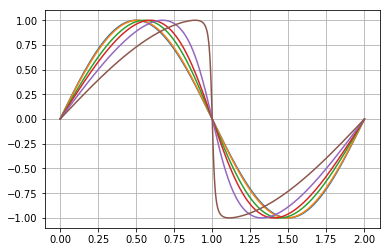

In [32]:
[plt.plot(deltas/np.pi, Is(tau,deltas)/max(Is(tau,deltas))) for tau in [0.001,0.1,0.5,0.7,0.9,0.999]]
plt.grid()
plt.show()
plt.close()